# Cryptocurrency Website API Pull

In [ ]:
# Application Program Interface (API)
# it is basically acts as an intermediary between two different applications that want to talk to each other
# an API typically has a client and a server 
# the client can be the application or the person that is submmitting the request
# the server is the application that is sending the response to the request

## Make a Test Call

In [ ]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

## Make a real Request

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100', # change the limit from 5000 to 100
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'Accept-Encoding': 'deflate, gzip',
  'X-CMC_PRO_API_KEY': '2849ed01-bf8d-42a1-ac24-6b404a4d7d95',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-05-12T06:17:27.789Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 9926}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11041, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
# the data above is in .json format, so we gotta make that more readable 
import pandas as pd

In [4]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-05-12T06:17:27.789Z,0,None,32,1,None,9926


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 7)

In [6]:
pd.json_normalize(data['data'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969718e+07,1.969718e+07,False,NaN,1,NaN,NaN,NaN,2024-05-12T06:16:00.000Z,60998.086574,1.297704e+10,-51.8721,-0.019821,0.139404,-3.730509,-13.939840,-15.666771,26.668903,1.201491e+12,53.1759,1.280960e+12,NaN,2024-05-12T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,8914,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201112e+08,1.201112e+08,True,NaN,2,NaN,NaN,NaN,2024-05-12T06:15:00.000Z,2925.350331,6.146049e+09,-48.4088,0.065624,0.221966,-5.310768,-17.258574,-27.605880,17.160808,3.513674e+11,15.5506,3.513674e+11,NaN,2024-05-12T06:15:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,85145,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.108400e+11,1.130866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-12T06:15:00.000Z,0.999605,2.678670e+10,-45.0406,-0.008583,-0.013937,-0.049029,-0.060851,-0.038163,-0.064956,1.107963e+11,4.9036,1.130419e+11,NaN,2024-05-12T06:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,4269,GateToken,GT,gatetoken,28,2019-08-20T00:00:00.000Z,"[marketplace, centralized-exchange, discount-t...",NaN,9.321912e+07,3.000000e+08,False,NaN,98,NaN,NaN,NaN,2024-05-12T06:16:00.000Z,8.088311,2.592523e+06,-15.3173,0.204927,-0.106630,1.596864,1.466530,19.780348,71.800419,7.539852e+08,0.0334,2.426493e+09,NaN,2024-05-12T06:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xe66747a101bff2dba3697199dcce5b743b454759
98,29870,BOOK OF MEME,BOME,book-of-meme,157,2024-03-14T11:43:10.000Z,"[memes, solana-ecosystem]",6.896633e+10,6.896633e+10,6.896633e+10,False,NaN,99,6.899965e+10,7.533861e+08,NaN,2024-05-12T06:15:00.000Z,0.010919,1.392746e+08,-39.0873,0.595803,-0.266345,-1.713447,-13.225795,1098.562866,1098.562866,7.530222e+08,0.0333,7.530222e+08,NaN,2024-05-12T06:15:00.000Z,5426.0,Solana,SOL,solana,ukHH6c7mMyiWCf1b9pnWe25TSpkDDt3H5pQZgZ74J82
99,1659,Gnosis,GNO,gnosis-gno,179,2017-05-01T00:00:00.000Z,"[services, decentralized-exchange-dex-token, d...",3.000000e+06,2.589588e+06,3.000000e+06,False,NaN,100,NaN,NaN,NaN,2024-05-12T06:15:00.000Z,285.863202,9.148167e+06,-31.3802,0.169427,-0.582971,-7.710735,-23.760689,-34.602750,12.286222,7.402679e+08,0.0328,8.575896e+08,NaN,2024-05-12T06:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6810e776880c02933d47db1b9fc05908e5386b96


In [7]:
pd.to_datetime('now')

Timestamp('2024-05-12 13:17:28.588496')

In [8]:
pd.to_datetime('now').strftime("%Y-%m-%d %H:%M:%S")

'2024-05-12 13:17:28'

In [9]:
# add a new column called 'Timestamp'
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now').strftime("%Y-%m-%d %H:%M:%S")
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969718e+07,1.969718e+07,False,NaN,1,NaN,NaN,NaN,2024-05-12T06:16:00.000Z,60998.086574,1.297704e+10,-51.8721,-0.019821,0.139404,-3.730509,-13.939840,-15.666771,26.668903,1.201491e+12,53.1759,1.280960e+12,NaN,2024-05-12T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-12 13:17:28
1,1027,Ethereum,ETH,ethereum,8914,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201112e+08,1.201112e+08,True,NaN,2,NaN,NaN,NaN,2024-05-12T06:15:00.000Z,2925.350331,6.146049e+09,-48.4088,0.065624,0.221966,-5.310768,-17.258574,-27.605880,17.160808,3.513674e+11,15.5506,3.513674e+11,NaN,2024-05-12T06:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-12 13:17:28
2,825,Tether USDt,USDT,tether,85145,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.108400e+11,1.130866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-12T06:15:00.000Z,0.999605,2.678670e+10,-45.0406,-0.008583,-0.013937,-0.049029,-0.060851,-0.038163,-0.064956,1.107963e+11,4.9036,1.130419e+11,NaN,2024-05-12T06:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-12 13:17:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,4269,GateToken,GT,gatetoken,28,2019-08-20T00:00:00.000Z,"[marketplace, centralized-exchange, discount-t...",NaN,9.321912e+07,3.000000e+08,False,NaN,98,NaN,NaN,NaN,2024-05-12T06:16:00.000Z,8.088311,2.592523e+06,-15.3173,0.204927,-0.106630,1.596864,1.466530,19.780348,71.800419,7.539852e+08,0.0334,2.426493e+09,NaN,2024-05-12T06:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xe66747a101bff2dba3697199dcce5b743b454759,2024-05-12 13:17:28
98,29870,BOOK OF MEME,BOME,book-of-meme,157,2024-03-14T11:43:10.000Z,"[memes, solana-ecosystem]",6.896633e+10,6.896633e+10,6.896633e+10,False,NaN,99,6.899965e+10,7.533861e+08,NaN,2024-05-12T06:15:00.000Z,0.010919,1.392746e+08,-39.0873,0.595803,-0.266345,-1.713447,-13.225795,1098.562866,1098.562866,7.530222e+08,0.0333,7.530222e+08,NaN,2024-05-12T06:15:00.000Z,5426.0,Solana,SOL,solana,ukHH6c7mMyiWCf1b9pnWe25TSpkDDt3H5pQZgZ74J82,2024-05-12 13:17:28
99,1659,Gnosis,GNO,gnosis-gno,179,2017-05-01T00:00:00.000Z,"[services, decentralized-exchange-dex-token, d...",3.000000e+06,2.589588e+06,3.000000e+06,False,NaN,100,NaN,NaN,NaN,2024-05-12T06:15:00.000Z,285.863202,9.148167e+06,-31.3802,0.169427,-0.582971,-7.710735,-23.760689,-34.602750,12.286222,7.402679e+08,0.0328,8.575896e+08,NaN,2024-05-12T06:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6810e776880c02933d47db1b9fc05908e5386b96,2024-05-12 13:17:28


In [10]:
df2 = pd.json_normalize(data['data'])
df2['timestamp'] = pd.to_datetime('now').strftime("%Y-%m-%d %H:%M:%S")

In [12]:
df = df._append(df2)

# Automate the Process

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
import pandas as pd

def cryptoapi_pull():
    global df # make df accesible outside the function
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'5', # change the limit from 5000 to 5 (top 5 cryptocurrency)
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'Accept-Encoding': 'deflate, gzip',
      'X-CMC_PRO_API_KEY': '2849ed01-bf8d-42a1-ac24-6b404a4d7d95',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    try :
        df
    except :
        df = pd.json_normalize(data['data'])
        df['timestamp'] = pd.to_datetime('now').strftime("%Y-%m-%d %H:%M:%S")
        print("df was not define, making a new df... ")
        print("successfully make a new df")
    else :
        df2 = pd.json_normalize(data['data'])
        df2['timestamp'] = pd.to_datetime('now').strftime("%Y-%m-%d %H:%M:%S")
        df = df._append(df2)
        
    path = r'C:\Users\yaser\Python Data Analytics\Projects\Crypto Website API Pull'
    output_file = 'API.xlsx'
    savefile = path + '\\' + output_file
        
    # Export data frame to Excel file (.xlsx)
    if not os.path.isfile(savefile):
        df.to_excel(savefile, header='column_names', index=False)
    else:
        with pd.ExcelWriter(savefile, mode='a', engine = 'openpyxl',if_sheet_exists="replace") as writer:
            df.to_excel(writer, sheet_name='Sheet1', header='column_names', index=False)

        # Export data frame to Excel file (.csv)
        #if not os.path.isfile(r"C:\Users\yaser\Python Data Analytics\Projects\Crypto Website API Pull\API.csv"):
        #    df.to_csv(r"C:\Users\yaser\Python Data Analytics\Projects\Crypto Website API Pull\API.xlsx", header='column_names', index=False)
        #else:
        #    df2.to_csv(r"C:\Users\yaser\Python Data Analytics\Projects\Crypto Website API Pull\API.xlsx", mode='a', header=False, index=False)

## Make a code that run and will stop the cryptoapi_pull() function if interupt kernel manually

In [8]:
# final desired code that can stop the cryptoapi_pull() manually
from time import sleep
pull_rate = input("How often do you want the API to pull the data (in seconds) :")
try:
    for i in range (1,334): # API key usage credit limit is 10000 / month, or 333 / day
        cryptoapi_pull()
        if i == 1:
            print("API pulled session :", str(i) +  '.', 'Completed!')
        else:
            print("API pulled session :", str(i) +  '.', 'Completed!', 'Appending to df...')
        sleep(int(pull_rate)) # Run session every what seconds that user define in 'pull_rate'
except (KeyboardInterrupt, SystemExit): # this exception can only run in Python 3 kernel (ipykernel)
    print("Pulling stopped manually at session :", str(i))
    del(df)

How often do you want the API to pull the data (in seconds) : 60


df was not define, making a new df... 
successfully make a new df
API pulled session : 1. Completed!
API pulled session : 2. Completed! Appending to df...
API pulled session : 3. Completed! Appending to df...
API pulled session : 4. Completed! Appending to df...
API pulled session : 5. Completed! Appending to df...
API pulled session : 6. Completed! Appending to df...
API pulled session : 7. Completed! Appending to df...
API pulled session : 8. Completed! Appending to df...
API pulled session : 9. Completed! Appending to df...
API pulled session : 10. Completed! Appending to df...
Pulling stopped manually at session : 10


# Make the caller of pulling API file that had been made, for further dataframe process

In [12]:
path = r'C:\Users\yaser\Python Data Analytics\Projects\Crypto Website API Pull'
output_file = 'API.xlsx'
savefile = path + '\\' + output_file

pd.set_option('display.max_columns', None)
df_api = pd.read_excel(savefile)
df_api

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.969756e+07,1.969756e+07,False,NaN,1,NaN,NaN,NaN,2024-05-13T03:45:00.000Z,60929.601395,1.617433e+10,21.9753,-0.164194,0.031460,-4.603860,-9.039961,-16.823584,22.292482,1.200164e+12,53.8009,1.279522e+12,NaN,2024-05-13T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 10:47:38
1,1027,Ethereum,ETH,ethereum,8915,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201112e+08,1.201112e+08,True,NaN,2,NaN,NaN,NaN,2024-05-13T03:45:00.000Z,2877.720826,7.620270e+09,20.3631,-0.124594,-1.382930,-8.270855,-10.677222,-27.985330,8.832451,3.456465e+11,15.5058,3.456465e+11,NaN,2024-05-13T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 10:47:38
2,825,Tether USDt,USDT,tether,85167,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.108400e+11,1.130866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-13T03:45:00.000Z,0.999664,3.098126e+10,13.0102,-0.012354,-0.012544,-0.064271,-0.057826,-0.070530,-0.067162,1.108028e+11,4.9706,1.130486e+11,NaN,2024-05-13T03:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-13 10:47:38
3,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475868e+08,1.475868e+08,False,NaN,4,NaN,NaN,NaN,2024-05-13T03:45:00.000Z,587.496036,1.375004e+09,9.6355,-0.211477,-0.450415,-0.554887,1.210269,-4.081040,79.741719,8.670668e+10,3.8897,8.670668e+10,NaN,2024-05-13T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 10:47:38
4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.485378e+08,5.758586e+08,True,NaN,5,NaN,NaN,NaN,2024-05-13T03:45:00.000Z,138.863401,1.250069e+09,18.5739,-1.615044,-5.144242,-5.086421,-8.331179,-16.551430,22.329494,6.228549e+10,2.7941,7.996569e+10,NaN,2024-05-13T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 10:47:38
5,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.969756e+07,1.969756e+07,False,NaN,1,NaN,NaN,NaN,2024-05-13T03:47:00.000Z,60955.211422,1.620133e+10,22.1779,-0.280484,0.103391,-4.549233,-8.981664,-16.765444,22.405240,1.200669e+12,53.8235,1.280059e+12,NaN,2024-05-13T03:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 10:48:40
6,1027,Ethereum,ETH,ethereum,8915,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201112e+08,1.201112e+08,True,NaN,2,NaN,NaN,NaN,2024-05-13T03:46:00.000Z,2877.590276,7.623313e+09,20.4027,-0.198781,-1.364141,-8.223676,-10.694404,-27.958310,8.841164,3.456309e+11,15.5051,3.456309e+11,NaN,2024-05-13T03:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 10:48:40
7,825,Tether USDt,USDT,tether,85167,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.108400e+11,1.130866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-13T03:46:00.000Z,0.999797,3.099276e+10,13.0528,0.013030,0.014651,-0.055669,-0.037531,-0.055506,-0.052082,1.108176e+11,4.9713,1.130636e+11,NaN,2024-05-13T03:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-13 10:48:40
8,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475868e+08,1.475868e+08,False,NaN,4,NaN,NaN,NaN,2024-05-13T0

## 1) doing cleaning and transforming process

In [67]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_api

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19697556.00,19697556.00,False,NaN,1,NaN,NaN,NaN,2024-05-13T03:45:00.000Z,60929.60,16174329052.61,21.98,-0.16,0.03,-4.60,-9.04,-16.82,22.29,1200164235534.99,53.80,1279521629294.25,NaN,2024-05-13T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 10:47:38
1,1027,Ethereum,ETH,ethereum,8915,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120111216.19,120111216.19,True,NaN,2,NaN,NaN,NaN,2024-05-13T03:45:00.000Z,2877.72,7620269839.56,20.36,-0.12,-1.38,-8.27,-10.68,-27.99,8.83,345646548302.98,15.51,345646548302.98,NaN,2024-05-13T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 10:47:38
2,825,Tether USDt,USDT,tether,85167,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,110840001385.79,113086550460.86,True,NaN,3,NaN,NaN,NaN,2024-05-13T03:45:00.000Z,1.00,30981256606.53,13.01,-0.01,-0.01,-0.06,-0.06,-0.07,-0.07,110802785964.72,4.97,113048580742.89,NaN,2024-05-13T03:45:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-13 10:47:38
3,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147586829.00,147586829.00,False,NaN,4,NaN,NaN,NaN,2024-05-13T03:45:00.000Z,587.50,1375003667.66,9.64,-0.21,-0.45,-0.55,1.21,-4.08,79.74,86706677065.34,3.89,86706677065.34,NaN,2024-05-13T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 10:47:38
4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,448537810.04,575858622.60,True,NaN,5,NaN,NaN,NaN,2024-05-13T03:45:00.000Z,138.86,1250069221.48,18.57,-1.62,-5.14,-5.09,-8.33,-16.55,22.33,62285485967.00,2.79,79965687070.18,NaN,2024-05-13T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 10:47:38
5,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19697556.00,19697556.00,False,NaN,1,NaN,NaN,NaN,2024-05-13T03:47:00.000Z,60955.21,16201329741.87,22.18,-0.28,0.10,-4.55,-8.98,-16.77,22.41,1200668690477.75,53.82,1280059439863.13,NaN,2024-05-13T03:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 10:48:40
6,1027,Ethereum,ETH,ethereum,8915,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120111216.19,120111216.19,True,NaN,2,NaN,NaN,NaN,2024-05-13T03:46:00.000Z,2877.59,7623313150.24,20.40,-0.20,-1.36,-8.22,-10.69,-27.96,8.84,345630867728.75,15.51,345630867728.75,NaN,2024-05-13T03:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 10:48:40
7,825,Tether USDt,USDT,tether,85167,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,110840001385.79,113086550460.86,True,NaN,3,NaN,NaN,NaN,2024-05-13T03:46:00.000Z,1.00,30992758508.49,13.05,0.01,0.01,-0.06,-0.04,-0.06,-0.05,110817552488.35,4.97,113063646560.27,NaN,2024-05-13T03:46:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-13 10:48:40
8,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147586829.00,147586829.00,False,NaN,4,NaN,NaN,NaN,2024-05-13T03:46:00.000Z,587.31,1375631763.85,9.69,-0.05,-0.49,-0.58,1.16,-4.19,79.66,86679155906.60,3.89,86679155906.60,NaN,2024-05-13T03:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 10:48:40
9,5426

In [15]:
df_api.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
id,1,1027,825,1839,5426,1,1027,825,1839,5426,1,1027,825,1839,5426,1,1027,825,1839,5426,1,1027,825,1839,5426,1,1027,825,1839,5426,1,1027,825,1839,5426,1,1027,825,1839,5426,1,1027,825,1839,5426,1,1027,825,1839,5426
name,Bitcoin,Ethereum,Tether USDt,BNB,Solana,Bitcoin,Ethereum,Tether USDt,BNB,Solana,Bitcoin,Ethereum,Tether USDt,BNB,Solana,Bitcoin,Ethereum,Tether USDt,BNB,Solana,Bitcoin,Ethereum,Tether USDt,BNB,Solana,Bitcoin,Ethereum,Tether USDt,BNB,Solana,Bitcoin,Ethereum,Tether USDt,BNB,Solana,Bitcoin,Ethereum,Tether USDt,BNB,Solana,Bitcoin,Ethereum,Tether USDt,BNB,Solana,Bitcoin,Ethereum,Tether USDt,BNB,Solana
symbol,BTC,ETH,USDT,BNB,SOL,BTC,ETH,USDT,BNB,SOL,BTC,ETH,USDT,BNB,SOL,BTC,ETH,USDT,BNB,SOL,BTC,ETH,USDT,BNB,SOL,BTC,ETH,USDT,BNB,SOL,BTC,ETH,USDT,BNB,SOL,BTC,ETH,USDT,BNB,SOL,BTC,ETH,USDT,BNB,SOL,BTC,ETH,USDT,BNB,SOL
slug,bitcoin,ethereum,tether,bnb,solana,bitcoin,ethereum,tether,bnb,solana,bitcoin,ethereum,tether,bnb,solana,bitcoin,ethereum,tether,bnb,solana,bitcoin,ethereum,tether,bnb,solana,bitcoin,ethereum,tether,bnb,solana,bitcoin,ethereum,tether,bnb,solana,bitcoin,ethereum,tether,bnb,solana,bitcoin,ethereum,tether,bnb,solana,bitcoin,ethereum,tether,bnb,solana
num_market_pairs,11041,8915,85167,2155,657,11041,8915,85167,2155,657,11041,8915,85167,2155,657,11041,8915,85167,2155,657,11041,8915,85167,2155,657,11041,8915,85167,2155,657,11041,8915,85167,2155,657,11041,8915,85167,2155,657,11041,8915,85167,2155,657,11041,8915,85167,2155,657
date_added,2010-07-13T00:00:00.000Z,2015-08-07T00:00:00.000Z,2015-02-25T00:00:00.000Z,2017-07-25T00:00:00.000Z,2020-04-10T00:00:00.000Z,2010-07-13T00:00:00.000Z,2015-08-07T00:00:00.000Z,2015-02-25T00:00:00.000Z,2017-07-25T00:00:00.000Z,2020-04-10T00:00:00.000Z,2010-07-13T00:00:00.000Z,2015-08-07T00:00:00.000Z,2015-02-25T00:00:00.000Z,2017-07-25T00:00:00.000Z,2020-04-10T00:00:00.000Z,2010-07-13T00:00:00.000Z,2015-08-07T00:00:00.000Z,2015-02-25T00:00:00.000Z,2017-07-25T00:00:00.000Z,2020-04-10T00:00:00.000Z,2010-07-13T00:00:00.000Z,2015-08-07T00:00:00.000Z,2015-02-25T00:00:00.000Z,2017-07-25T00:00:00.000Z,2020-04-10T00:00:00.000Z,2010-07-13T00:00:00.000Z,2015-08-07T00:00:00.000Z,2015-02-25T00:00:00.000Z,2017-07-25T00:00:00.000Z,2020-04-10T00:00:00.000Z,2010-07-13T00:00:00.000Z,2015-08-07T00:00:00.000Z,2015-02-25T00:00:00.000Z,2017-07-25T00:00:00.000Z,2020-04-10T00:00:00.000Z,2010-07-13T00:00:00.000Z,2015-08-07T00:00:00.000Z,2015-02-25T00:00:00.000Z,2017-07-25T00:00:00.000Z,2020-04-10T00:00:00.000Z,2010-07-13T00:00:00.000Z,2015-08-07T00:00:00.000Z,2015-02-25T00:00:00.000Z,2017-07-25T00:00:00.000Z,2020-04-10T00:00:00.000Z,2010-07-13T00:00:00.000Z,2015-08-07T00:00:00.000Z,2015-02-25T00:00:00.000Z,2017-07-25T00:00:00.000Z,2020-04-10T00:00:00.000Z
tags,"['mineable', 'pow', 'sha-256', 'store-of-value...","['pos', 'smart-contracts', 'ethereum-ecosystem...","['stablecoin', 'asset-backed-stablecoin', 'ava...","['marketplace', 'centralized-exchange', 'payme...","['pos', 'platform', 'solana-ecosystem', 'cms-h...","['mineable', 'pow', 'sha-256', 'store-of-value...","['pos', 'smart-contracts', 'ethereum-ecosystem...","['stablecoin', 'asset-backed-stablecoin', 'ava...","['marketplace', 'centralized-exchange', 'payme...","['pos', 'platform', 'solana-ecosystem', 'cms-h...","['mineable', 'pow', 'sha-256', 'store-of-value...","['pos', 'smart-contracts', 'ethereum-ecosystem...","['stablecoin', 'asset-backed-stablecoin', 'ava...","['marketplace', 'centralized-exchange', 'payme...","['pos', 'platform', 'solana-ecosystem', 'cms-h...","['mineable', 'pow', 'sha-256', 'store-of-value...","['pos', 'smart-contracts', 'ethereum-ecosystem...","['stablecoin', 'asset-backed-stablecoin', 'ava...","['marketplace', 'centralized-exchange', 'payme...","['pos', 'platform', 'solana-ecosystem', 'cms-h...","['mineable', 'pow', 'sha-256', 'store-of-value...","['pos', 'smart-contracts', 'ether

In [29]:
df_api_change = df_api.iloc[:,[1] +list(range(20,26))] # take the column with index 1, 20-25 from 'df_api'
df_api_change

,name,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
0,Bitcoin,-0.16,0.03,-4.60,-9.04,-16.82,22.29
1,Ethereum,-0.12,-1.38,-8.27,-10.68,-27.99,8.83
2,Tether USDt,-0.01,-0.01,-0.06,-0.06,-0.07,-0.07
3,BNB,-0.21,-0.45,-0.55,1.21,-4.08,79.74
4,Solana,-1.62,-5.14,-5.09,-8.33,-16.55,22.33
5,Bitcoin,-0.28,0.10,-4.55,-8.98,-16.77,22.41
6,Ethereum,-0.20,-1.36,-8.22,-10.69,-27.96,8.84
7,Tether USDt,0.01,0.01,-0.06,-0.04,-0.06,-0.05
8,BNB,-0.05,-0.49,-0.58,1.16,-4.19,79.66
9,Solana,-1.22,-5.17,-5.01,-8.39,-16.55,22.37


In [52]:
df_mean = df_api_change.groupby('name',sort = False).mean() # doing grouping and averaging 
df_mean

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.05,0.18,-4.43,-8.89,-16.69,22.57
Ethereum,-0.02,-1.30,-8.07,-10.55,-27.87,9.09
Tether USDt,-0.00,0.01,-0.04,-0.04,-0.05,-0.06
BNB,0.00,-0.43,-0.50,1.19,-4.16,79.92
Solana,-0.94,-4.94,-4.74,-7.99,-16.59,22.88


In [54]:
df_stack = df_mean.stack()
df_stack

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.05
             quote.USD.percent_change_24h     0.18
             quote.USD.percent_change_7d     -4.43
             quote.USD.percent_change_30d    -8.89
             quote.USD.percent_change_60d   -16.69
             quote.USD.percent_change_90d    22.57
Ethereum     quote.USD.percent_change_1h     -0.02
             quote.USD.percent_change_24h    -1.30
             quote.USD.percent_change_7d     -8.07
             quote.USD.percent_change_30d   -10.55
             quote.USD.percent_change_60d   -27.87
             quote.USD.percent_change_90d     9.09
Tether USDt  quote.USD.percent_change_1h     -0.00
             quote.USD.percent_change_24h     0.01
             quote.USD.percent_change_7d     -0.04
             quote.USD.percent_change_30d    -0.04
             quote.USD.percent_change_60d    -0.05
             quote.USD.percent_change_90d    -0.06
BNB          quote.USD.percent_change_1h

In [55]:
# After stacking, the dataframe transformed into series type
type(df_stack)

pandas.core.series.Series

In [58]:
# so we need to convert it back into dataframe to visualize it later
df_conv = df_stack.to_frame(name = 'values')
df_conv

values
name                                            
Bitcoin     quote.USD.percent_change_1h    -0.05
            quote.USD.percent_change_24h    0.18
            quote.USD.percent_change_7d    -4.43
            quote.USD.percent_change_30d   -8.89
            quote.USD.percent_change_60d  -16.69
            quote.USD.percent_change_90d   22.57
Ethereum    quote.USD.percent_change_1h    -0.02
            quote.USD.percent_change_24h   -1.30
            quote.USD.percent_change_7d    -8.07
            quote.USD.percent_change_30d  -10.55
            quote.USD.percent_change_60d  -27.87
            quote.USD.percent_change_90d    9.09
Tether USDt quote.USD.percent_change_1h    -0.00
            quote.USD.percent_change_24h    0.01
            quote.USD.percent_change_7d    -0.04
            quote.USD.percent_change_30d   -0.04
            quote.USD.percent_change_60d   -0.05
            quote.USD.percent_change_90d   -0.06
BNB         quote.USD.percent_change_1h     0.00
            quote.USD.percent_change_24h   -0.43
            quote.USD.percent_change_7d    -0.50
            quote.USD.percent_change_30d    1.19
            quote.USD.percent_change_60d   -4.16
            quote.USD.percent_change_90d   79.92
Solana      quote.USD.percent_change_1h    -0.94
            quote.USD.percent_change_24h   -4.94
            quote.USD.percent_change_7d    -4.74
            quote.USD.percent_change_30d   -7.99
            quote.USD.percent_change_60d  -16.59
            quote.USD.percent_change_90d   22.88

In [59]:
df_conv.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('Bitcoin', 'quote.USD.percent_change_1h') to ('Solana', 'quote.USD.percent_change_90d')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   values  30 non-null     float64
dtypes: float64(1)
memory usage: 801.0+ bytes


In [65]:
# the issue is the 'name' is kind of acting like an index, which we don't want
df_idx = df_conv.reset_index()
df_idx

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.05
1,Bitcoin,quote.USD.percent_change_24h,0.18
2,Bitcoin,quote.USD.percent_change_7d,-4.43
3,Bitcoin,quote.USD.percent_change_30d,-8.89
4,Bitcoin,quote.USD.percent_change_60d,-16.69
5,Bitcoin,quote.USD.percent_change_90d,22.57
6,Ethereum,quote.USD.percent_change_1h,-0.02
7,Ethereum,quote.USD.percent_change_24h,-1.30
8,Ethereum,quote.USD.percent_change_7d,-8.07
9,Ethereum,quote.USD.percent_change_30d,-10.55


In [66]:
df_rename = df_idx.rename(columns= {'level_1' : 'percent_change'})
df_rename

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.05
1,Bitcoin,quote.USD.percent_change_24h,0.18
2,Bitcoin,quote.USD.percent_change_7d,-4.43
3,Bitcoin,quote.USD.percent_change_30d,-8.89
4,Bitcoin,quote.USD.percent_change_60d,-16.69
5,Bitcoin,quote.USD.percent_change_90d,22.57
6,Ethereum,quote.USD.percent_change_1h,-0.02
7,Ethereum,quote.USD.percent_change_24h,-1.30
8,Ethereum,quote.USD.percent_change_7d,-8.07
9,Ethereum,quote.USD.percent_change_30d,-10.55


In [76]:
df_rename['percent_change'].replace({'quote.USD.percent_change_1h' : '1h',
                                     'quote.USD.percent_change_24h': '24h',
                                     'quote.USD.percent_change_7d' : '7d',
                                     'quote.USD.percent_change_30d': '30d',
                                     'quote.USD.percent_change_60d': '60d',
                                     'quote.USD.percent_change_90d': '90d'
                                    },inplace = True)

## 2) doing visualization

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

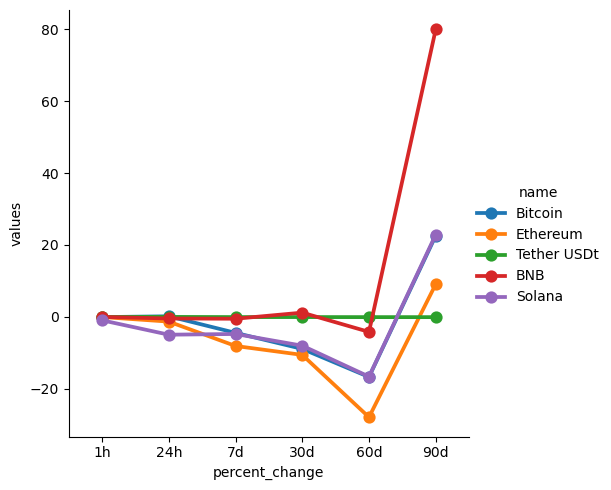

In [77]:
sns.catplot(df_rename, x = 'percent_change', y ='values', hue = 'name',kind = 'point')